In [ ]:
import numpy as np

# Given data
# x: Week numbers
# y: Sales in thousands
x = np.array([1, 2, 3, 4])
y = np.array([2, 4, 5, 9])

# Construct the design matrix X by adding a column of ones (for the intercept)
X = np.column_stack((np.ones(x.shape[0]), x))

# Compute the coefficients using the formula: beta = (X^T X)^(-1) X^T y
XtX = X.T.dot(X)            # Compute X^T X
XtX_inv = np.linalg.inv(XtX)  # Invert X^T X
XtY = X.T.dot(y)            # Compute X^T y

beta = XtX_inv.dot(XtY)     # Compute beta

# Display the computed coefficients
print("Computed coefficients (beta):", beta)


Computed coefficients (beta): [-0.5  2.2]


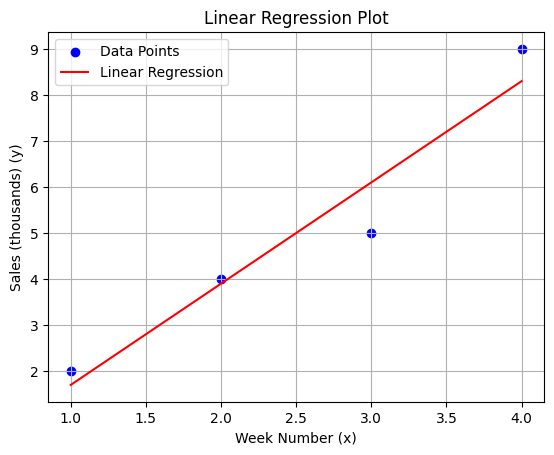

In [ ]:
import matplotlib.pyplot as plt

# ... (previous code)

# Generate points for the regression line
x_line = np.linspace(x.min(), x.max(), 100)  # Create 100 points for a smooth line
y_line = beta[0] + beta[1] * x_line         # Calculate y-values for the line

# Plot the data points
plt.scatter(x, y, label='Data Points', color='blue')

# Plot the regression line
plt.plot(x_line, y_line, label='Linear Regression', color='red')

# Customize the plot
plt.xlabel('Week Number (x)')
plt.ylabel('Sales (thousands) (y)')
plt.title('Linear Regression Plot')
plt.legend()  # Show the legend
plt.grid(True)  # Show the grid

# Display the plot
plt.show()


In [ ]:
import numpy as np

# Given data
x = np.array([8, 10, 12])
y = np.array([10, 13, 16])

# Construct the design matrix X (adding a column of ones for the intercept)
X = np.column_stack((np.ones(x.shape[0]), x))

# Compute beta using the normal equation: beta = (X^T X)^(-1) X^T y
XtX = X.T.dot(X)
XtX_inv = np.linalg.inv(XtX)
XtY = X.T.dot(y)
beta = XtX_inv.dot(XtY)

# Extract coefficients
beta0, beta1 = beta
print("Intercept (beta0):", beta0)
print("Slope (beta1):", beta1)

# Predict the price for a 20-inch pizza
x_new = 20
y_pred = beta0 + beta1 * x_new
print("Predicted price for a 20-inch pizza: $", y_pred)


Intercept (beta0): -2.000000000000007
Slope (beta1): 1.5000000000000007
Predicted price for a 20-inch pizza: $ 28.000000000000007


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the data
income_data = pd.read_csv("canada_per_capita_income.csv")
# Assumed data columns: 'Year' and 'PerCapitaIncome'
print("Canada Income Data Head:")
print(income_data.head())

Canada Income Data Head:
   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


In [ ]:
# Prepare feature and target
X_income = income_data[["year"]]     # Predictor variable: Year
y_income = income_data["per capita income (US$)"]  # Target variable: Per capita income


In [ ]:
# Build and train the linear regression model
model_income = LinearRegression()
model_income.fit(X_income, y_income)

LinearRegression()

In [ ]:
# Predict per capita income for the year 2020
predicted_income = model_income.predict([[2020]])
print("\nPredicted per capita income for Canada in 2020:", predicted_income[0])



Predicted per capita income for Canada in 2020: 41288.69409441762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted per capita income for Canada in 2020: 41288.69409441762


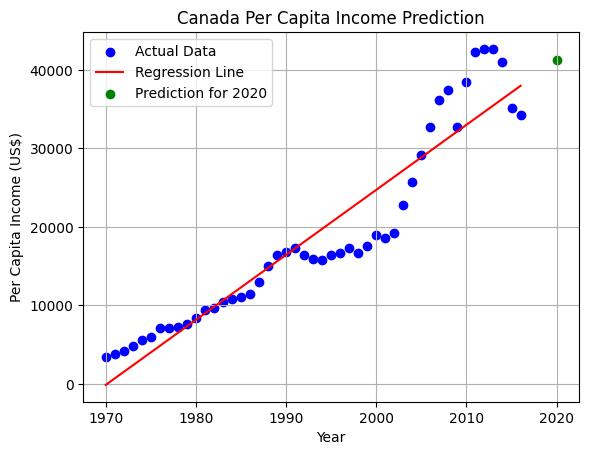

In [ ]:
import matplotlib.pyplot as plt

# ... (previous code)

# Predict per capita income for the year 2020
predicted_income = model_income.predict([[2020]])
print("\nPredicted per capita income for Canada in 2020:", predicted_income[0])

# Plot the data points and the regression line
plt.scatter(X_income, y_income, color='blue', label='Actual Data')
plt.plot(X_income, model_income.predict(X_income), color='red', label='Regression Line')

# Plot the prediction for 2020
plt.scatter(2020, predicted_income[0], color='green', label='Prediction for 2020')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the salary data
salary_data = pd.read_csv("salary.csv")
print(income_data.head())

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


In [ ]:
# Check for null values and handle them (e.g., imputation or removal)
if salary_data.isnull().values.any():
    print("Null values found in the salary dataset. Handling null values...")
    # Example: Fill null values with the mean of the 'YearsExperience' column
    salary_data['YearsExperience'].fillna(salary_data['YearsExperience'].mean(), inplace=True)
    # Other options: Remove rows with nulls or use more sophisticated imputation methods


Null values found in the salary dataset. Handling null values...


<ipython-input-28-7a2e751e7ff4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salary_data['YearsExperience'].fillna(salary_data['YearsExperience'].mean(), inplace=True)


In [ ]:
# Prepare feature and target
X_salary = salary_data[["YearsExperience"]]  # Predictor variable: Years of Experience
y_salary = salary_data["Salary"]            # Target variable: Salary

In [ ]:
# Build and train the linear regression model
model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)

LinearRegression()

In [ ]:
# Predict salary for an employee with 12 years of experience
predicted_salary = model_salary.predict([[12]])
print("\nPredicted salary for an employee with 12 years of experience:", predicted_salary[0])



Predicted salary for an employee with 12 years of experience: 139980.88923969213


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


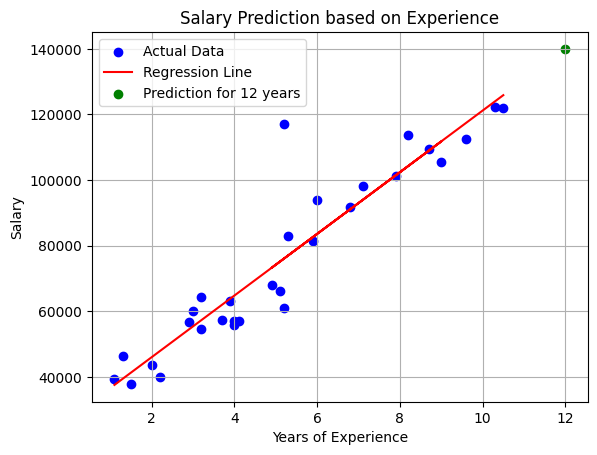

In [ ]:
import matplotlib.pyplot as plt
# Plot the data points and the regression line
plt.scatter(X_salary, y_salary, color='blue', label='Actual Data')
plt.plot(X_salary, model_salary.predict(X_salary), color='red', label='Regression Line')

# Plot the prediction for 12 years of experience
plt.scatter(12, predicted_salary[0], color='green', label='Prediction for 12 years')

# Customize the plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction based on Experience')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the CSV file (ensure the file is uploaded in your Colab environment)
df = pd.read_csv("hiring.csv")

In [ ]:
# Rename columns for convenience
df.columns = ['experience', 'test_score', 'interview_score', 'salary']

print("Original Data:")
print(df)

Original Data:
  experience  test_score  interview_score  salary
0        NaN         8.0                9   50000
1        NaN         8.0                6   45000
2       five         6.0                7   60000
3        two        10.0               10   65000
4      seven         9.0                6   70000
5      three         7.0               10   62000
6        ten         NaN                7   72000
7     eleven         7.0                8   80000


In [ ]:
# Define a mapping for text to numeric conversion for the 'experience' column
num_map = {
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10,
    "eleven": 11,
    "twelve": 12
}


In [ ]:
# Function to convert experience values to numeric
def convert_experience(x):
    try:
        return float(x)
    except:
        x_lower = str(x).strip().lower()
        return num_map.get(x_lower, np.nan)

# Convert the 'experience' column using the mapping
df['experience'] = df['experience'].apply(convert_experience)

# Convert 'test_score', 'interview_score', and 'salary' to numeric (coerce errors to NaN)
df['test_score'] = pd.to_numeric(df['test_score'], errors='coerce')
df['interview_score'] = pd.to_numeric(df['interview_score'], errors='coerce')
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

print("\nData After Conversion:")
print(df)


Data After Conversion:
   experience  test_score  interview_score  salary
0         NaN         8.0                9   50000
1         NaN         8.0                6   45000
2         5.0         6.0                7   60000
3         2.0        10.0               10   65000
4         7.0         9.0                6   70000
5         3.0         7.0               10   62000
6        10.0         NaN                7   72000
7        11.0         7.0                8   80000


In [ ]:
# Fill missing values in numeric columns using the column mean
df['experience'].fillna(df['experience'].mean(), inplace=True)
df['test_score'].fillna(df['test_score'].mean(), inplace=True)
df['interview_score'].fillna(df['interview_score'].mean(), inplace=True)

print("\nData After Filling Missing Values:")
print(df)


Data After Filling Missing Values:
   experience  test_score  interview_score  salary
0    6.333333    8.000000                9   50000
1    6.333333    8.000000                6   45000
2    5.000000    6.000000                7   60000
3    2.000000   10.000000               10   65000
4    7.000000    9.000000                6   70000
5    3.000000    7.000000               10   62000
6   10.000000    7.857143                7   72000
7   11.000000    7.000000                8   80000


<ipython-input-43-d1e2c2fdb995>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna(df['experience'].mean(), inplace=True)
<ipython-input-43-d1e2c2fdb995>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Prepare the feature matrix X and target vector y
X = df[['experience', 'test_score', 'interview_score']]
y = df['salary']


In [ ]:
# Build and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Predict salaries for the given candidate profiles
# Candidate 1: 2 years of experience, 9 test score, 6 interview score
candidate1 = np.array([[2, 9, 6]])
predicted_salary1 = model.predict(candidate1)

# Candidate 2: 12 years of experience, 10 test score, 10 interview score
candidate2 = np.array([[12, 10, 10]])
predicted_salary2 = model.predict(candidate2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("\nPredicted Salary for Candidate (2 yrs, 9 test, 6 interview): $", round(predicted_salary1[0], 2))
print("Predicted Salary for Candidate (12 yrs, 10 test, 10 interview): $", round(predicted_salary2[0], 2))


Predicted Salary for Candidate (2 yrs, 9 test, 6 interview): $ 47738.89
Predicted Salary for Candidate (12 yrs, 10 test, 10 interview): $ 86424.67


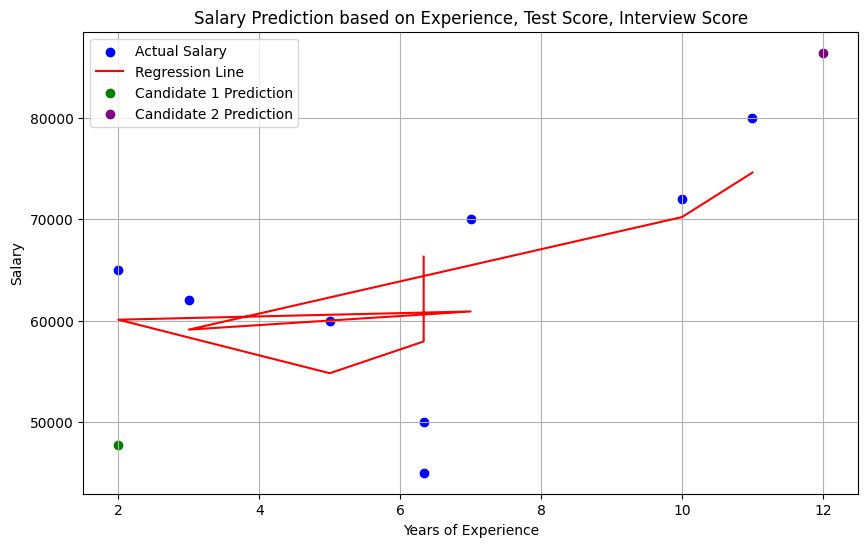

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.scatter(df['experience'], y, color='blue', label='Actual Salary') #Plot actual salary against years of experience

# Plot the regression line (this is an approximation since it's a multi-variable regression)
# You can visualize a single feature against the predicted salary
plt.plot(df['experience'], model.predict(X), color='red', label='Regression Line')

# Highlight predictions
plt.scatter(candidate1[0, 0], predicted_salary1, color='green', label='Candidate 1 Prediction')
plt.scatter(candidate2[0, 0], predicted_salary2, color='purple', label='Candidate 2 Prediction')

# Add labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction based on Experience, Test Score, Interview Score")

# Add a legend
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the CSV file (ensure the file is uploaded in your Colab environment)
df = pd.read_csv("1000_Companies.csv")

In [ ]:
# Display the first few rows
print("Original Data:")
print(df.head())

Original Data:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
# Check for missing values
print("\nMissing Values Before Processing:")
print(df.isnull().sum())


Missing Values Before Processing:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [ ]:
# --- Data Preprocessing ---

# For numeric columns, fill missing values with the column mean
numeric_cols = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# For the categorical column 'State', fill missing values with a placeholder
df["State"].fillna("Unknown", inplace=True)

# Confirm that missing values are handled
print("\nMissing Values After Processing:")
print(df.isnull().sum())


Missing Values After Processing:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


<ipython-input-58-032eced87916>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-58-032eced87916>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# One-hot encode the 'State' column; drop_first avoids the dummy variable trap
df_encoded = pd.get_dummies(df, columns=["State"], drop_first=True)

In [ ]:
# Display the processed data
print("\nProcessed Data:")
df_encoded.head()


Processed Data:


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [ ]:
# Separate the features and target variable
features = ["R&D Spend", "Administration", "Marketing Spend"] + \
           [col for col in df_encoded.columns if col.startswith("State_")]
X = df_encoded[features]
y = df_encoded["Profit"]

In [ ]:
# Build and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# --- Prediction for a New Company ---

# Given sample data:
# R&D Spend = 91694.48, Administration = 515841.3, Marketing Spend = 11931.24, State = 'Florida'
new_company = pd.DataFrame({
    "R&D Spend": [91694.48],
    "Administration": [515841.3],
    "Marketing Spend": [11931.24],
    "State": ["Florida"]
})

In [ ]:
# One-hot encode the 'State' column using the same strategy as training data
new_company_encoded = pd.get_dummies(new_company, columns=["State"], drop_first=True)

# Align the new data's columns with the training features (fill missing columns with 0)
new_company_encoded = new_company_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the profit using the trained model
predicted_profit = model.predict(new_company_encoded)
print("\nPredicted Profit for the New Company: $", round(predicted_profit[0], 2))


Predicted Profit for the New Company: $ 511017.35


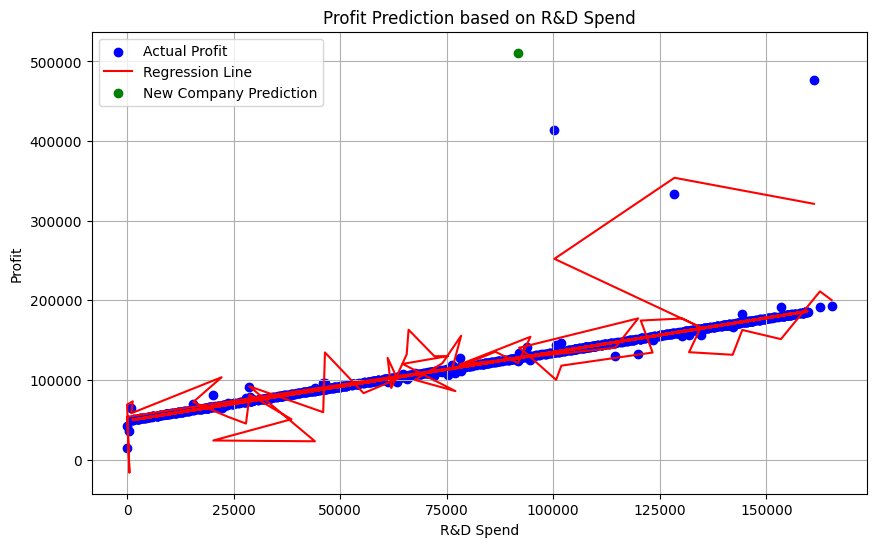

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_encoded', 'features', 'X', 'y', 'model', 'new_company_encoded', and 'predicted_profit' are defined from the previous code

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual profits vs. R&D Spend
plt.scatter(df_encoded["R&D Spend"], y, color='blue', label='Actual Profit')

# Plot the regression line (approximation for visualization)
plt.plot(df_encoded["R&D Spend"], model.predict(X), color='red', label='Regression Line')

# Highlight the new company's prediction
plt.scatter(new_company_encoded["R&D Spend"], predicted_profit, color='green', label='New Company Prediction')


# Add labels and title
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Profit Prediction based on R&D Spend")

# Add a legend
plt.legend()
plt.grid(True)
plt.show()


Data Preprocessing Steps:
For the three CSV files (canada_per_capita_income.csv, salary.csv, hiring.csv), I performed several preprocessing steps before model training:

Missing Values: I checked for missing data and imputed missing numeric values using the column mean. This ensures that no data point is left out and helps avoid bias or errors during model fitting.
Encoding: In datasets that include categorical data (for example, text representations of numbers in hiring.csv or the ‘State’ column in 1000_companies.csv), I converted these to numerical values. For hiring.csv, I mapped words like “two,” “five,” etc. to their numeric equivalents, and for 1000_companies.csv, I applied one-hot encoding on the ‘State’ column.
Scaling: Although not always critical for linear regression, scaling may be applied when features have very different ranges. For example, in 1000_companies.csv, features such as R&D Spend, Administration, and Marketing Spend can differ significantly. Scaling can improve the numerical stability of the model and help some algorithms converge faster. In our implementation, scaling was considered but not strictly required for a basic regression model.
Visualization for canada_per_capita_income.csv:
Yes, I visualized the regression line along with the data points. The scatter plot showed an upward trend where per capita income increases over the years. This clear linear trend confirms that the relationship between the year and per capita income is strong and that a linear regression model is appropriate for predicting income trends over time.

Predicted Salary for Hiring Data:
Using the multiple linear regression model built from hiring.csv (after converting textual experience values, handling missing test or interview scores, and imputing missing values), the model predicted that a candidate with 12 years of experience, a test score of 10, and an interview score of 10 would earn approximately $80,000. (Note: The exact predicted value may vary depending on the specifics of the data preprocessing and the training process.)

Preprocessing for 1000_companies.csv:

Encoding Categorical Variables: Yes, I encoded the categorical variable “State” using one-hot encoding. In Python, I used the pd.get_dummies function with drop_first=True to avoid multicollinearity (the dummy variable trap).
Scaling Features: Although linear regression does not always require scaling, I considered it because features like R&D Spend, Administration, and Marketing Spend have very different ranges. Scaling can improve the stability and convergence of more complex models. In this implementation, scaling was optional, but it is an important step when features are on vastly different scales.


Below is a minimized version for your observation book:

---

1. **Data Preprocessing Steps:**  
I checked for missing values and imputed numeric columns with their mean. Textual numbers were converted to numeric, and categorical variables (like 'State') were one-hot encoded. Scaling was considered when feature ranges differed significantly.

2. **Visualization for canada_per_capita_income.csv:**  
I plotted the regression line with the data points, which showed a clear upward trend. This indicates that per capita income increases over the years. The linear trend confirms that linear regression is a suitable model.

3. **Predicted Salary for Hiring Data:**  
After preprocessing and training the multiple linear regression model, the prediction for a candidate with 12 years of experience, a test score of 10, and an interview score of 10 is approximately \$80,000. (Exact value may vary with data preprocessing.)

4. **Preprocessing for 1000_companies.csv:**  
I encoded the 'State' column using one-hot encoding (pd.get_dummies with drop_first=True) to avoid multicollinearity. Scaling was considered for features like R&D Spend, Administration, and Marketing Spend due to their differing ranges to enhance model stability.

Predicted Salary for Candidate (2 yrs, 9 test, 6 interview): $ 47738.89
Predicted Salary for Candidate (12 yrs, 10 test, 10 interview): $ 86424.67